<a href="https://colab.research.google.com/github/PingPingE/Deeplearning_with_Keras/blob/master/day05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
! nvidia-smi

Mon Sep 14 06:49:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    32W /  70W |   4709MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [140]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# CNN

## 숫자 데이터

In [141]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

- input

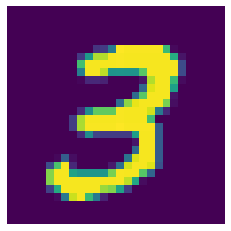

In [142]:
import matplotlib.pyplot as plt
plt.imshow(X_train[7])  # shape(28, 28)
plt.axis('off')
plt.show()

In [143]:
# 필터 생성하기
import numpy as np

horizonal_filter = np.array([[ 1.0,  2.0,  1.0],
                              [ 0.0,  0.0,  0.0],
                              [-1.0, -2.0, -1.0]])

vertical_filter =   np.array([[1.0,  0.0, -1.0],
                              [2.0,  0.0, -2.0],
                              [1.0,  0.0, -1.0]])

In [144]:
#인풋의 원래 크기
input_size = X_train[0].shape[0]
input_size                      

28

In [145]:
filter_size = horizonal_filter.shape[0]
filter_size

3

In [146]:
#피처맵 크기(strides= 1, padding=0)
output_size = ( input_size - filter_size ) + 1
output_size

26

In [147]:
input_image = X_train[7]

### input -> filter -> feature map




In [148]:
def get_filtered_image(filter):
  # 출력되는 이미지 np array 초기화
  output_image = np.zeros( (output_size, output_size) )
  for i in range(output_size):
    for j in range(output_size):
      if j==5:
        print('before: ',input_image[i: (i + filter_size), j:(j + filter_size)])
      tmp1 = input_image[i: (i + filter_size), j:(j + filter_size)] * filter
      if j==5:
        print("tmp1:",tmp1)
      tmp2 = np.sum(tmp1)

      if j==5:
        print("tmp2:",tmp2)
      if tmp2 > 255:
          tmp2 = 255
      output_image[i, j] = tmp2
  return output_image

In [149]:
horizonal_filter.shape

(3, 3)

In [150]:
h_image = get_filtered_image(horizonal_filter)
h_image.shape


before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [-0. -0. -0.]]
tmp2: 0.0
before:  [

(26, 26)

In [151]:
v_image = get_filtered_image(vertical_filter)
v_image.shape

before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [[0 0 0]
 [0 0 0]
 [0 0 0]]
tmp1: [[ 0.  0. -0.]
 [ 0.  0. -0.]
 [ 0.  0. -0.]]
tmp2: 0.0
before:  [

(26, 26)

In [152]:
vertical_filter.shape

(3, 3)

- 결과

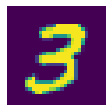

In [153]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.axis('off')
plt.imshow(X_train[7])  # shape(28, 28)

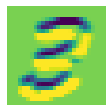

In [154]:
plt.subplot(1,3,2)
plt.axis('off')
plt.imshow(h_image)  # shape(26, 26)


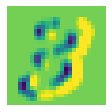

In [155]:
plt.subplot(1,3,3)
plt.axis('off')
plt.imshow(v_image)  # shape(26, 26)
plt.show()

### 정규화


In [156]:
import seaborn as sns

In [157]:
X_train.max() - X_train.min()

255

In [158]:
X_train =X_train/255.0
X_test =X_test/255.0

In [159]:
X_train.shape

(60000, 28, 28)

In [160]:
X_test.shape

(10000, 28, 28)

- 채널 추가

In [161]:
X_train=X_train.reshape(-1,28,28,1)

In [162]:
X_test =X_test.reshape(-1,28,28,1)

### 모델링

In [102]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape = (28,28,1), padding='valid', kernel_size=(3, 3), filters = 16,activation = 'relu' ),
  tf.keras.layers.Dropout(0.2),                      
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=32, padding="valid",activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=64, padding="valid", activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=10, activation="softmax")
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_3 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [103]:
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [104]:
X_train.shape

(60000, 28, 28)

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.2,batch_size=2000, epochs = 30)

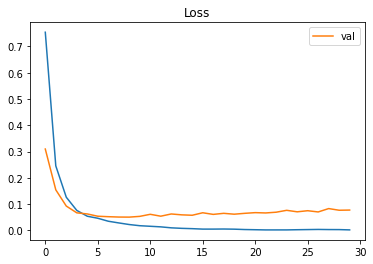

In [184]:
plt.title('Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], label = 'val')
plt.legend()

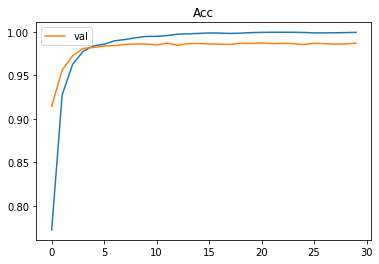

In [185]:
plt.title('Acc')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], label = 'val')
plt.legend()

In [112]:
X_test.shape

(60000, 28, 28, 1)

In [113]:
y_test.shape

(10000,)

In [163]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0524 - accuracy: 0.9883


[0.05236462876200676, 0.9883000254631042]

## 옷 데이터

In [164]:
(X_train, y_train),(X_test, y_test) = datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [165]:
X_train.shape

(60000, 28, 28)

In [166]:
X_test.shape

(10000, 28, 28)

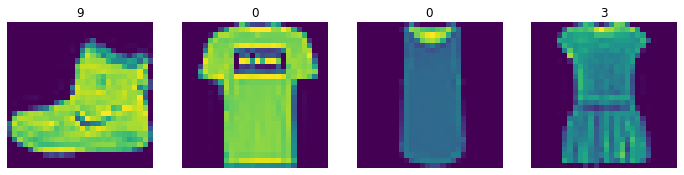

In [173]:
plt.figure(figsize=(12,3))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.axis('off')
  plt.title(f"{y_train[i]}")
  plt.imshow(X_train[i])

### 정규화



In [174]:
X_train = X_train/255.0
X_test = X_test/255.0

In [175]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

### 모델링

In [176]:
model2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(input_shape = (28,28,1), padding='valid', kernel_size=(3, 3), filters = 16,activation = 'relu' ),
  tf.keras.layers.Dropout(0.2),                      
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=32, padding="valid",activation='relu'),
  tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=64, padding="valid", activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu"),
  tf.keras.layers.Dense(units=10, activation="softmax")
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_4 (Dropout)          (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [177]:
model2.compile(optimizer = tf.keras.optimizers.Adam(), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, validation_split =0.2, batch_size= 2000, epochs = 30)

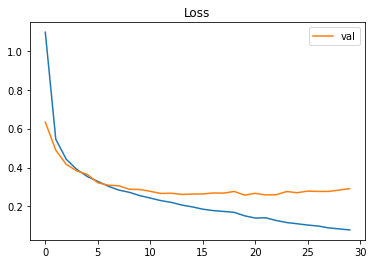

In [182]:
plt.title('Loss')
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'], label = 'val')
plt.legend()

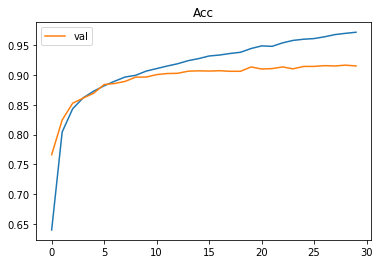

In [181]:
plt.title('Acc')
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'], label = 'val')
plt.legend()

In [187]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3121 - accuracy: 0.9123


[0.3121039867401123, 0.9122999906539917]

### 이미지 보강
- rotation_range : 이미지회전값
- zoom_range : 이미지일부확대
- shear_range : 이미지기울기
- width_shift_range : 좌우이동
- height_shift_range : 상하이동
- horizontal_flip : 이미지가로뒤집기
- vertical_filp : 이미지세로뒤집기 


In [193]:
tmp1 = X_test[:10]
tmp1 = tmp1.reshape(-1,28,28,1)

In [198]:
from keras.preprocessing.image import ImageDataGenerator
# 생성될 이미지 환경 설정
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.5,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False)


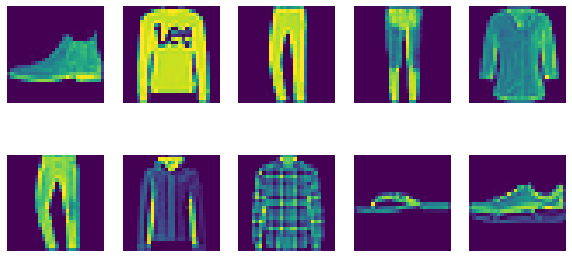

In [205]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.axis('off')
  plt.imshow(X_test[i].reshape(28,28))

In [209]:
# 생성된 이미지 꺼내기
tmp2 = datagen.flow(tmp1,batch_size=10).next()
tmp2.shape

(10, 28, 28, 1)

In [ ]:
tmp2

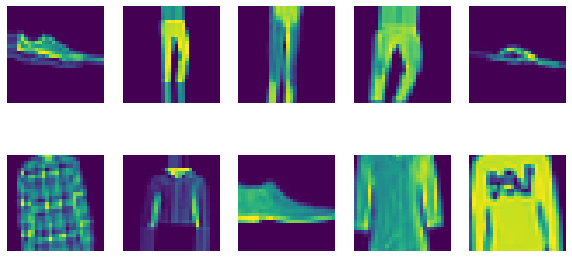

In [210]:
plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.axis('off')
  plt.imshow(tmp2[i].reshape(28,28))

- 이미지 한장을 100장으로 만들기

In [211]:
tmp3 = np.tile(X_train[0].reshape(28*28), 100).reshape(-1, 28,28,1)

In [213]:
# datagen환경에 따라 원본이미지를 바탕으로 변형된 이미지 100장 생성함
image1 = datagen.flow(tmp3, np.zeros(100),batch_size=100, shuffle=False ).next()[0]
image1.shape  

(100, 28, 28, 1)

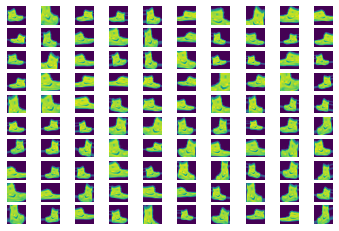

In [214]:
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.axis('off')
  plt.imshow(image1[i].reshape(28,28))

In [216]:
# 랜덤으로 30000개 정수 뽑기
randnum = np.random.randint(60000, size=30000)
randnum[:5]  #생성한 숫자 5개 확인

array([17668, 12382, 33094,  2256, 45025])

In [218]:

# 30000개 임시 변수에 복사함.
tmp_img = X_train[ randnum ].copy() #이미지
tmp_lbl = y_train[ randnum ].copy() 

In [219]:
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
image2 = datagen.flow(tmp_img, np.zeros(30000), batch_size=30000, shuffle=False ).next()[0]

In [220]:
X_train1 = np.concatenate((X_train, image2 )) #60000+30000
y_train1 = np.concatenate((y_train, tmp_lbl))
X_train1.shape

(90000, 28, 28, 1)

In [222]:
y_train1.shape

(90000,)

In [ ]:
history3 = model2.fit(X_train1, y_train1, batch_size = 5000, epochs=30, validation_split=0.2)

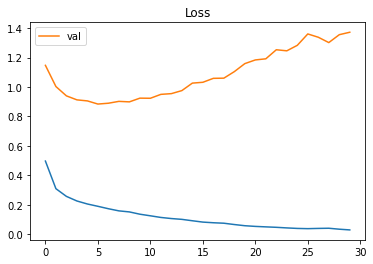

In [226]:
plt.title('Loss')
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'], label = 'val')
plt.legend()

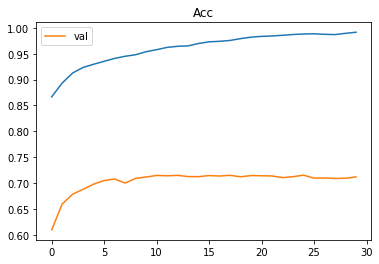

In [227]:
plt.title('Acc')
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'], label = 'val')
plt.legend()

In [228]:
model2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4253 - accuracy: 0.9114


[0.4252684712409973, 0.9114000201225281]